# Stations **Bixi**, bon pain - mauvais pain, et lieux culturels

## Explorer la gentrification à Montréal à l'aide des clichés "bobos"

***Par Yann Audin, Sara-Maude Bergeron, Émile Caron, Yanet Hernández.***

Le développement des stations de Bixi à Montréal ne fut pas un processus neutre, divers facteurs culturels et financiers guident l'installation des bornes de vélos locatifs. Pour explorer les biais et les pressions économiques qui dictent la présence de Bixi, caractériser les quartiers de Montréal, et envisager les enjeux de gentrification de la ville de Montréal, nous proposons une visualisation de certains marqueurs de richesses (financières et culturelles) et de pauvreté (financière). 

À l'aide de données ouvertes récupérées auprès de la ville de Montréal et Bixi, et d'APIs de géolocalisation, nous cherchons à tirer des conclusions sur l'interaction entre les populations mieux nanties (celles qui vivent dans des quartiers de maisons unifamiliales et celles qui vivent dans des quartiers à haute densité) et les populations moins bien nanties (celles qui vivent près du centre, et celles qui vivent loin du centre). 

Cetains symboles sont donc utilisés comme marqueurs : les Maxi et Super C, les boulangeries et épiceries fines, les lieux culturels et surtout, les stations de Bixi.

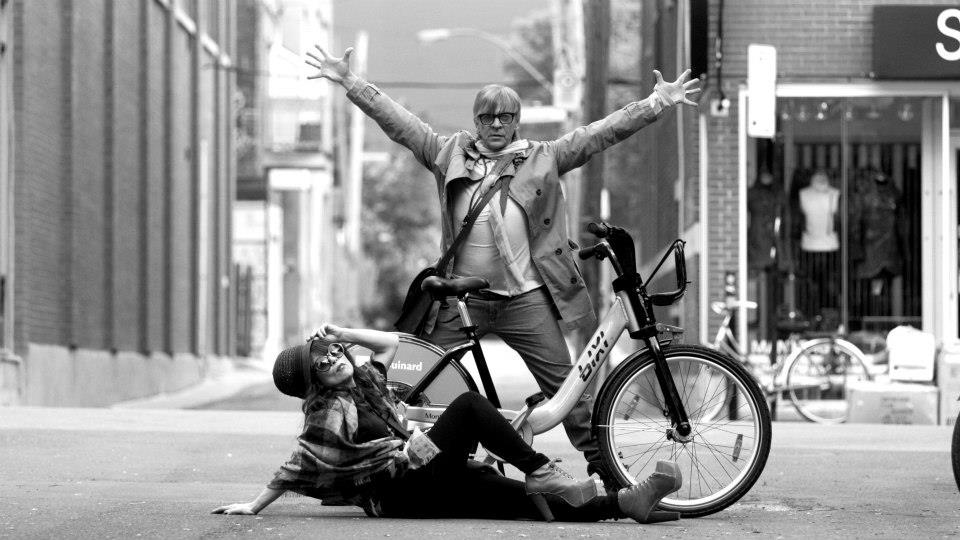

wtfpl-badge-1.png

*Les images ne sont pas soumises à cette licence et sont la propriété de la Société de production de Télé-Québec*

## Étape 1 : Sations de Bixi et création de la nomencalture

### `Import` des différents modules et création des DB

`pandas` sert à la lecture de CSV et `folium` à l'attribution de données visuelles géographiques. Deux modules folium seront utilisé ; nous y reviendrons. Pour le moment, seul `pandas` sera utilisé.

**Documentation : https://github.com/pandas-dev/pandas**

In [ ]:
import pandas as pd
import json
import folium

Deux fonctions dans la cellule suivante : 
1. Fonction pour importer un document csv en DataFrame
2. Fonction pour importer un document json en données

In [ ]:
def csv_to_dataframe(path):
    return pd.read_csv(path)

def json_read(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data 

#### Lecture des CSV par le module `pandas` et création des DB

In [ ]:
list_paths = ["lieuxculturels.csv", 
              "bixistations.csv"]

df1 = csv_to_dataframe(list_paths[0])
df2 = csv_to_dataframe(list_paths[1])




In [ ]:
def json_read(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data 

In [ ]:
fichier = "bixi.json"

with open (fichier,'r') as file:
    dbixi = json.load(file)

---

### Test 1 : Association des valeurs `[name]`, `[latitude]` et `[longitude]` et retrait des doublons

Avant d'allez plus loins, nous désirons valider que les modules qui font la lecture des données fonctionnent et qu'il n'y a pas d'erreur / doublons.

> Exemple : La sation Duluth/St-Denis coontient un si grand nombre de vélos qu'elle est présentée en double dans le `fichier bixi.csv`. Nous avons éliminé les doublons grace à la syntaxe suivante : 
```
l1=[]
l2=[]
for i in df2['name'].tolist():
    if i not in l1:
        l1.append(i)   
    else:
        l2.append(i)
```


In [ ]:
df2.loc[df2['name'] == 'Victoria / 18e avenue Lachine']['latitude'].values[0]

45.435996

In [ ]:
l1=[]
l2=[]
for i in df2['name'].tolist():
    
    if i not in l1:
        l1.append(i)
        
    else:
        l2.append(i)

In [ ]:
df2.loc[df2['name'] == 'Duluth  / St-Denis']

,pk,name,latitude,longitude
748,1287,Duluth / St-Denis,45.520802,-73.575799
760,1300,Duluth / St-Denis,45.520802,-73.575799


In [ ]:
liste_bixi=[]
for n in df2['name'].tolist():
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0]
    dict_bixi={'nom':n, 'latitude':latitude, 'longitude':longitude}
    #liste_bixi.append(dict_bixi)

### Création de la carte à partir du module `folium`

Cette étape concsiste à illustrer sur la carte de Montréal l'emplacement des stations.

La syntaxe : 
```
c=folium.Map(location=[longitude, latitude])
```
sert à choisir la région que nous voulons que la carte affiche. Puisqu'il s'agit d'un test, nous l'avons nommé `c`.



In [ ]:
c=folium.Map(location=[45.44691, -73.67112])

Nous sauvons ici la carte dans le fichier projet, de sorte à ce que les point puissent y être accolées.

In [ ]:
c.save('maCarteBixi')

`c ` *sert à afficher la carte dans le notebook et d'éviter un aller retour vers le fichier de la carte.*

In [ ]:
c

#### Test 2 : Affichage des noms des sations 

In [ ]:
for n in df2['name'].tolist():
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0]
    name = df2.loc[df2['name'] == n]['name'].values[0]
    #dict_bixi={'nom':n, 'latitude':latitude, 'longitude':longitude}
    print(name)

LaSalle / 90e avenue
Métro Angrignon (Lamont /  des Trinitaires)
Métro de l'Église (Ross / de l'Église)
Tolhurst / Fleury
University / des Pins
Métro Vendôme (de Marlowe / de Maisonneuve)
Métro Université de Montréal (Édouard-Montpetit / Louis-Collin)
Bel Air / St-Antoine
St-Joseph / 8e avenue Lachine
8e avenue / Notre-Dame Lachine
Victoria / 18e avenue Lachine
Parthenais / du Mont-Royal
Parc Pratt (Dunlop / Van Horne)
Darling / Sherbrooke
Métro Rosemont (de St-Vallier / Rosemont)
7e avenue / St-Joseph Rosemont
16e avenue / St-Joseph
Cité des Arts du Cirque (Paul Boutet / des Regrattiers)
Rousselot / Jarry
de la Salle / Ontario
St-Charles / Labonté
St-Alexandre / Ste-Catherine
Jeanne-d'Arc / Ontario
d'Orléans / Hochelaga
Marché Maisonneuve
Ontario / Sicard
de Ville-Marie / Ste-Catherine
Ontario / Viau
Gauthier / Papineau
Gauthier / de Lorimier
Gauthier / Parthenais
de Bordeaux / Marie-Anne
des Érables / Rachel
Bercy / Rachel
Ste-Catherine / Dezery
Dézéry / Ontario
Métro Préfontaine (Mo

In [ ]:
dict_bixi

{'nom': 'Duluth  / St-Denis', 'latitude': 45.5208024, 'longitude': -73.5757989}

#### Ajout de points sur la carte

La syntaxe suivante permet d'afficher les points. 

```
c = folium.Map(location=[45.44691, -73.67112], zoom_start=10) [!Pour la carte qui affiche les coordonnées 45.44691, -73.67112 et qui affiche un zoom de 10...]
for n in df2['name'].tolist(): 
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0] [! ... ajouter des points sur les coodonées de la DB bixi.csv] 
    name = df2.loc[df2['name'] == n]['name'].values[0] [!... et sur chacun de ses points, ajouter le nom associer à la ligne du dossier CVS]
    folium.Marker([latitude,longitude],popup=name).add_to(c)
```
Chaque point comporte donc les valeurs [name], [latitude] et [longitude] qui on été vérrifié lors du *Test 1*

Il est donc possible, en demandant C, d'afficher une carte des stations de Bixi ou chaque point indique le nom.


In [ ]:
c = folium.Map(location=[45.44691, -73.67112], zoom_start=12)
for n in df2['name'].tolist():
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0]
    name = df2.loc[df2['name'] == n]['name'].values[0]
    folium.Marker([latitude,longitude],popup=name).add_to(c)

In [ ]:
c

### Discution et observation de l'Étape 1 

Les modules pandas ont bien convertis les CSV : nous reprendrons donc la même syntaxe pour l'étape 2 et les lieux culturels

Sur l'affichages des points : les noms des stations ne sont pas évocateurs dans la question et les points sont trop nombreux sur la carte. Nous utiliserons donc le module folium des marqueurs pour les lieux culturels. Pour les bixis, nous favoriserons un affichage de type *heatMap* sur lequel les lieux culturels seront marqués. 

**Documentation : https://github.com/python-visualization/folium**



#### Addendum de l'Étape 1 : La création de la heatMap 

La *heatMap* fonctionne de la même façon que le module de base folium, mais nécéssite le `plugins HeatMap`. 

Cette fois-ci, ce sera la fonction `map-obj` que nous utiliserons pour appeler la carte.

In [ ]:
from folium.plugins import HeatMap
map_obj = folium.Map(location=[45.44691, -73.67112], zoom_start=12)
lats_longs = []
for n in df2['name'].tolist():
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0]
    lats_longs.append([latitude, longitude])
HeatMap(lats_longs, radius = 15, blur = 15, overlay = True).add_to(map_obj)

In [ ]:
map_obj



---



## Étape 2 : Lieux culturels


Nous reprendrons le même code que nous avons utilisé pour les sation de Bixi puisque les lieux culturels sont moint nombreux et la position exacte de ceux-ci est nécéssaire à rendre la carte évocatrice.

In [ ]:
for i in df1['Nom du lieu culturel municipal'].tolist():
    lat = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Latitude'].values[0]
    lon = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Longitude'].values[0]
    nom = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Nom du lieu culturel municipal'].values[0]
    folium.Marker([lat,lon],popup=nom).add_to(map_obj)

In [ ]:
map_obj

### Discution et observations de l'Étape 2 

La base de données que nous avons choisie ne semble pas prendre en compte l'intégralité de ce que nous appelons des ''lieux de culture''. Exemple évoquant, le musée des Beaux-Arts de n'y trouve pas...

Dans l'idée de tirer des conslusions au sujet de la gentrification, il faudrait trouvé d'autres données, notament : 


* Cafés
* Restaurant
* Musées
* Épicerie bio
* À un niveau plus large nécéssitant une restructuration du projet, les revenus par foyer...


---







## Étape 3 : Ajout de d'autres DB et création de *HeatMap* de différentes couleurs



Il faut maintenant ajouter un nouveau jeu de données que nous avons associer à la gentrification : les boulangerie !

Ce nouveau jeu nécéssite la superposition des couleurs de *HeatMap* afin de pouvoir arriver à un visuel comparatif. 

L'ajout du jeux de données pour les boulangerie à été traité comme les deux précédent (Bixi et Lieux de culture), nous ne documenterons pas davantage.

L'ajout des couleurs s'est fait grace à la syntaxe  : 

`HeatMap(lats_longs, radius = 15, blur = 15, overlay = True, gradient = {0.4: '#couleur', 0.65: '#couleur', 1: '#couleur'}).add_to(map_obj)`

In [ ]:
map_comm = folium.Map(location=[45.482950, -73.581599], zoom_start=12)

map_obj = folium.Map(location=[45.44691, -73.67112], zoom_start=12)

lats_longs = []

for n in df2['name'].tolist():
    latitude = df2.loc[df2['name'] == n]['latitude'].values[0]
    longitude = df2.loc[df2['name'] == n]['longitude'].values[0]
    lats_longs.append([latitude, longitude])

HeatMap(lats_longs, radius = 15, blur = 15, overlay = True, 
        gradient = {0.4: 'red', 0.65: 'red', 1: 'red'}).add_to(map_obj)

lats_longs = []

for u in boulangerie['NOM_ETAB'].tolist():
    latit = boulangerie.loc[boulangerie['NOM_ETAB'] == u]['LAT'].values[0]
    longit = boulangerie.loc[boulangerie['NOM_ETAB'] == u]['LONG'].values[0]
    lats_longs.append([latit, longit])

HeatMap(lats_longs, radius = 5, blur = 5, overlay = False, 
        gradient = {0.4: 'lime', 0.65: 'lime', 1: 'lime'}).add_to(map_obj)

for i in df1['Nom du lieu culturel municipal'].tolist():
    lat = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Latitude'].values[0]
    lon = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Longitude'].values[0]
    nom = df1.loc[df1['Nom du lieu culturel municipal'] == i]['Nom du lieu culturel municipal'].values[0]
    folium.Marker([lat,lon],popup=nom).add_to(map_obj)

Nous avons ajouté les 3 jeux à la carte déja créée nommée `map_obj`.

In [ ]:
map_obj

### Discution de l'étape 3

Les choix des couleur doit être pris en compte pour bien illustrer les régions dont la concentration en points n'est pas forte.

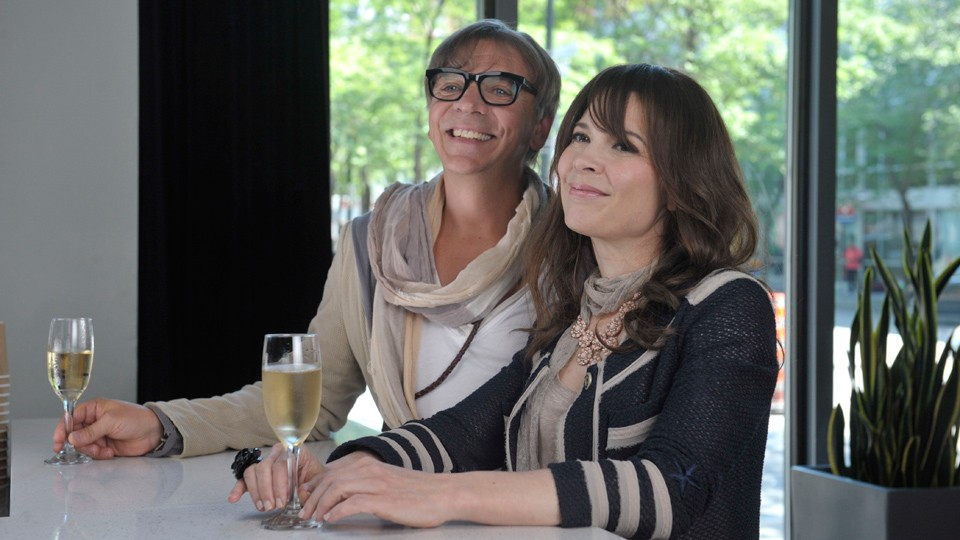

---



## Étape 4 : Pousser les "clichés bobo" au bout



Rendu à cette étape, il nous fallait un contre exemple de gentrification. Quel est l'inverse d'un Inter-Marché, d'un Première Moisson ou Marché Public ? Un **MAXI.**

Comment être 100% certain de la relation entre Bixi et gentrification ? Y ajouter les données de localisation des friperies montréalaises !

In [ ]:
import json
with open('maxi.json', 'r') as f:
    maxi = json.load(f)
for i in maxi:
    lat = i["lat"]
    lon = i["lon"]
    nom = i["display_name"]
    icon = folium.Icon(color='orange')
    folium.Marker([lat,lon], popup=nom, icon=icon).add_to(map_obj)

    with open('superc.json', 'r') as f:superc = json.load(f)

for i in superc:
    lat = i["lat"]
    lon = i["lon"]
    nom = i["display_name"]
    icon = folium.Icon(color='orange')
    folium.Marker([lat,lon], popup=nom, icon=icon).add_to(map_obj)

Les marqueurs beige indiquent les épiceries que nous avons considérées "non-bobo" (Maxi et SuperC), les nuage rouge, les stations de Bixi, les points bleu sont les lieux de culture et les nuages verts sont les boulangeries.

In [ ]:
map_obj

Continuons avec les summum de la bourgoisie bohémienne : les fripperies (en violet) et les épiceries fines (en vert puisque ajouté aux Boulangeries).

In [ ]:
dfc = pd.read_csv('commerces2022.csv', encoding = "UTF-8", sep=',', low_memory=False)
lats_longs2 =[]
epicerieSp = dfc.loc[dfc['USAGE3'].str.contains("Épicerie spécialisée")]
for epi in epicerieSp['NOM_ETAB'].tolist():
    latit = epicerieSp.loc[epicerieSp['NOM_ETAB'] == epi]['LAT'].values[0]
    longit = epicerieSp.loc[epicerieSp['NOM_ETAB']== epi]['LONG'].values[0]
    lats_longs2.append([latit, longit])
    
HeatMap(lats_longs2, radius = 5, blur = 5, overlay = False, gradient = {0.4: 'lime', 0.65: 'lime', 1: 'lime'}).add_to(map_obj)

friperie = dfc.loc[dfc['NOM_ETAB'].str.contains("Friperie")]
mapfriperie = folium.Map(location=[45.566367, -73.585823], zoom_start=12)
for f in friperie['NOM_ETAB'].tolist():
    latf = friperie.loc[friperie['NOM_ETAB'] == f]['LAT'].values[0]
    lonf = friperie.loc[friperie['NOM_ETAB'] == f]['LONG'].values[0]
    nomf = friperie.loc[friperie['NOM_ETAB'] == f]['NOM_ETAB'].values[0]
    icon = folium.Icon(color='purple')
    folium.Marker([latf,lonf],popup=nomf, icon = icon).add_to(map_obj)

## Conclusion

In [ ]:
map_obj

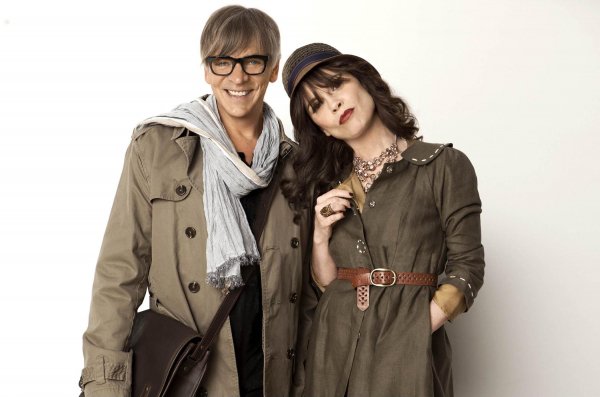

